In [126]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
plt.style.use('default')

branch_metrics = pd.read_csv('data/clean/branch_metrics.csv')
#branch_metrics['COMPUTER_SESSIONS_2'] = branch_metrics['COMPUTER_SESSIONS'].fillna(0)
#branch_metrics['VISITORS_2'] = branch_metrics['VISITORS'].fillna(0)

branch_metrics_nonzero = branch_metrics[(branch_metrics['VISITORS'] > 0) & (branch_metrics['COMPUTER_SESSIONS'] > 0)]

#branch_metrics_nonzero['COMPUTER_SESSIONS_2'] = branch_metrics_nonzero['COMPUTER_SESSIONS'].fillna(0)
#branch_metrics_nonzero['VISITORS_2'] = branch_metrics_nonzero['VISITORS'].fillna(0)

#2011 and 2012 have NaN values

Graphs from Yesterday
- circ over years by branch
- circ over months (averaged years) by branch
- circ over years -- top 5 and bottom 5 branches

- circ/visitosrs on line graph -- averaged out -- done
- circ vs visitors scatterplot -- done

To do
- add computer sessions and visitors to my all time line
- track circulation per visitor for a full year pre downloadable materials and post downloadable materials (eg 2017 vs 2022)

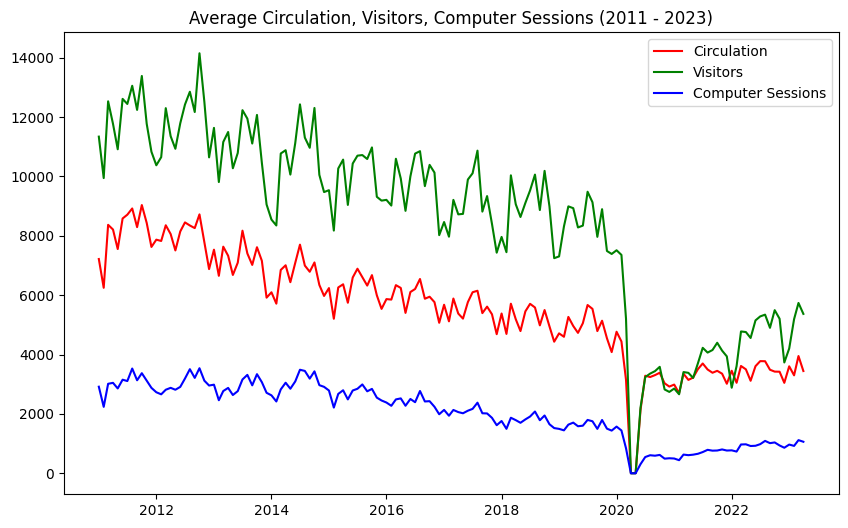

In [121]:
# Convert the 'YEAR' and 'MONTH' columns to a datetime format
branch_metrics['DATE'] = pd.to_datetime(branch_metrics[['YEAR', 'MONTH']].assign(DAY=1))

# Group the data by 'DATE' and calculate the mean number of circulation
monthly_circ = branch_metrics.groupby('DATE')['CIRCULATION'].mean()
monthly_vis = branch_metrics.groupby('DATE')['VISITORS'].mean()
monthly_comp = branch_metrics.groupby('DATE')['COMPUTER_SESSIONS'].mean()

# Plot the monthly visitor patterns
plt.figure(figsize=(10,6)) 
plt.plot(monthly_circ, color = 'red')
plt.plot(monthly_vis, color = 'green')
plt.plot(monthly_comp, color = 'blue')
plt.legend(['Circulation', 'Visitors', 'Computer Sessions'])
plt.title('Average Circulation, Visitors, Computer Sessions (2011 - 2023)')
#plt.ylabel('USD (in 2020 dollars)')
#plt.xlabel('Year')
plt.show()

In [63]:
#print(branch_metrics_nonzero.head(5))

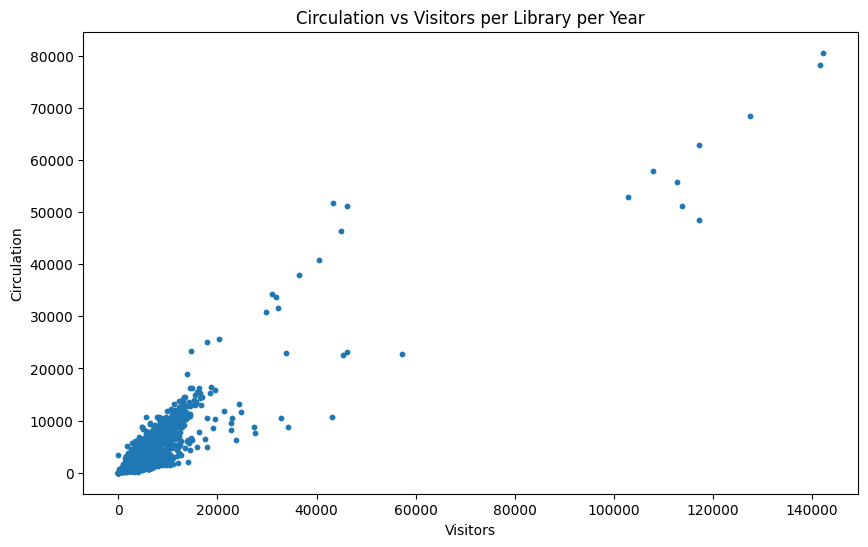

In [122]:
plt.figure(figsize=(10,6)) 
yearly_cpv = branch_metrics.groupby(['BRANCH','YEAR']).mean()
scatter = plt.scatter(x=yearly_cpv['VISITORS'], y=yearly_cpv['CIRCULATION'],s=10)
plt.title('Circulation vs Visitors per Library per Year')
plt.xlabel('Visitors')                                 
plt.ylabel('Circulation')   
plt.show()

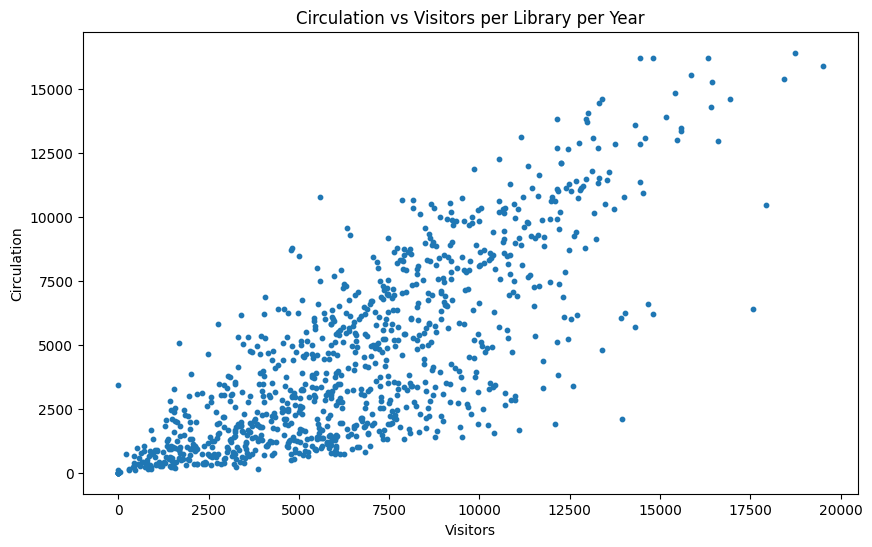

In [129]:
plt.figure(figsize=(10,6)) 
yearly_cpv = branch_metrics.groupby(['BRANCH','YEAR'])[['CIRCULATION','VISITORS']].mean().reset_index()
yearly_cpv_xoutliers = yearly_cpv.loc[yearly_cpv['BRANCH'] != 'Harold Washington Library Center'] # most visitors and circ
yearly_cpv_xoutliers = yearly_cpv_xoutliers.loc[yearly_cpv_xoutliers['BRANCH'] != 'Sulzer Regional'] # 2nd most visitors and circ
yearly_cpv_xoutliers = yearly_cpv_xoutliers.loc[yearly_cpv_xoutliers['BRANCH'] != 'Woodson Regional'] # next most visitors
yearly_cpv_xoutliers = yearly_cpv_xoutliers.loc[yearly_cpv_xoutliers['BRANCH'] != 'Chinatown'] # next most visitors

scatter = plt.scatter(x=yearly_cpv_xoutliers['VISITORS'], y=yearly_cpv_xoutliers['CIRCULATION'],s=10)
plt.title('Circulation vs Visitors per Library per Year')
plt.xlabel('Visitors')                                 
plt.ylabel('Circulation')   
plt.show()

In [130]:
yearly_cpv_xoutliers_xNaN = yearly_cpv_xoutliers.dropna()

model = LinearRegression()
model.fit(yearly_cpv_xoutliers_xNaN['VISITORS'].to_numpy().reshape((-1, 1)), yearly_cpv_xoutliers_xNaN['CIRCULATION'].to_numpy())
r_sq = model.score(yearly_cpv_xoutliers_xNaN['VISITORS'].to_numpy().reshape((-1, 1)), yearly_cpv_xoutliers_xNaN['CIRCULATION'].to_numpy())
print("coefficient of determination", r_sq)
print("intercept:", model.intercept_)
print("slope", model.coef_)

coefficient of determination 0.620745842034558
intercept: -600.020731686217
slope [0.77100006]


/tmp/ipykernel_601499/138715848.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  branch_metrics_nonzero['DATE'] = pd.to_datetime(branch_metrics_nonzero[['YEAR', 'MONTH']].assign(DAY=1))
/tmp/ipykernel_601499/138715848.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  branch_metrics_nonzero['CIRC PER VISITOR'] = branch_metrics_nonzero['CIRCULATION']/branch_metrics_nonzero['VISITORS']


<Axes: title={'center': 'Average of Circulation Per Visitor of All Branches'}, xlabel='Date', ylabel='Average Circulation per Visitor'>

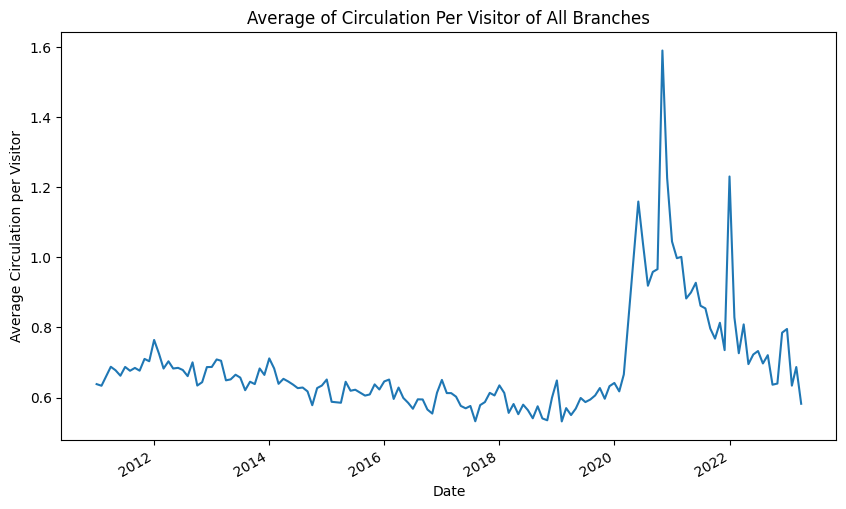

In [125]:
branch_metrics_nonzero['DATE'] = pd.to_datetime(branch_metrics_nonzero[['YEAR', 'MONTH']].assign(DAY=1))
branch_metrics_nonzero['CIRC PER VISITOR'] = branch_metrics_nonzero['CIRCULATION']/branch_metrics_nonzero['VISITORS']
#print(branch_metrics.head(5))
    
# Group the data by 'DATE' and calculate the mean number of circulation
monthly_cpv = branch_metrics_nonzero.groupby('DATE')['CIRC PER VISITOR'].mean()

monthly_cpv.plot(figsize=(10, 6), xlabel='Date', ylabel='Average Circulation per Visitor', title ='Average of Circulation Per Visitor of All Branches')

/tmp/ipykernel_601499/2249176593.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  circ_years.drop(columns = 'BRANCH', inplace = True)


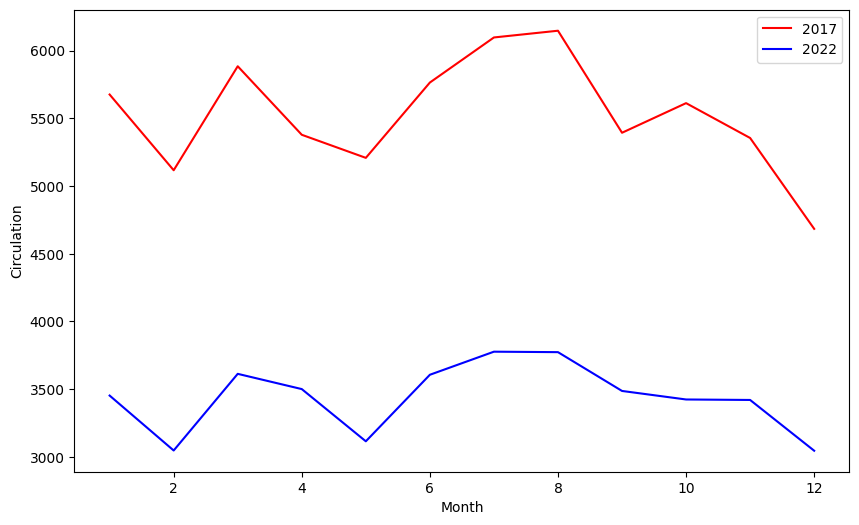

In [101]:
circ_years = branch_metrics.loc[(branch_metrics['YEAR']==2017)|(branch_metrics['YEAR']==2022)]
circ_years.drop(columns = 'BRANCH', inplace = True)

circ_years_2017 = circ_years.loc[(circ_years['YEAR']==2017)]
circ_years_2022 = circ_years.loc[(circ_years['YEAR']==2022)]
circ_years_2017 = circ_years_2017.groupby(['MONTH'])[['CIRCULATION']].mean()
circ_years_2022 = circ_years_2022.groupby(['MONTH'])[['CIRCULATION']].mean()

plt.figure(figsize=(10,6)) 
plt.plot(circ_years_2017, color = 'red')
plt.plot(circ_years_2022, color = 'blue')
plt.legend(['2017', '2022'])
plt.ylabel('Circulation')
plt.xlabel('Month')
plt.show()

/tmp/ipykernel_601499/270821058.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  circ_years_2.drop(columns = 'BRANCH', inplace = True)
/tmp/ipykernel_601499/270821058.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  circ_years_2['CIRC PER VISITOR'] = circ_years['CIRCULATION']/circ_years['VISITORS']


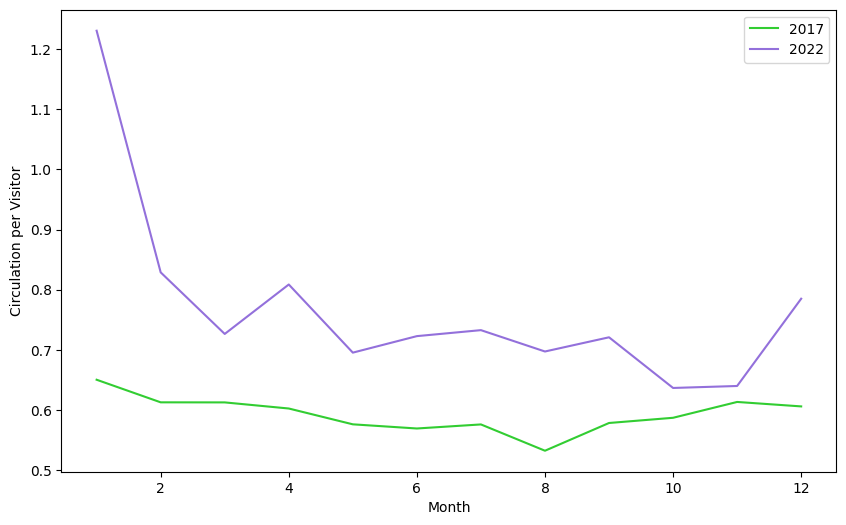

In [127]:
circ_years_2 = branch_metrics_nonzero.loc[(branch_metrics_nonzero['YEAR']==2017)|(branch_metrics_nonzero['YEAR']==2022)]
circ_years_2.drop(columns = 'BRANCH', inplace = True)
circ_years_2['CIRC PER VISITOR'] = circ_years['CIRCULATION']/circ_years['VISITORS']

cpv_2017 = circ_years_2.loc[(circ_years_2['YEAR']==2017)]
cpv_2022 = circ_years_2.loc[(circ_years_2['YEAR']==2022)]
cpv_2017 = cpv_2017.groupby(['MONTH'])[['CIRC PER VISITOR']].mean()
cpv_2022 = cpv_2022.groupby(['MONTH'])[['CIRC PER VISITOR']].mean()

plt.figure(figsize=(10,6)) 
plt.plot(cpv_2017, color = 'limegreen')
plt.plot(cpv_2022, color = 'mediumpurple')
plt.legend(['2017', '2022'])
plt.ylabel('Circulation per Visitor')
plt.xlabel('Month')
plt.show()

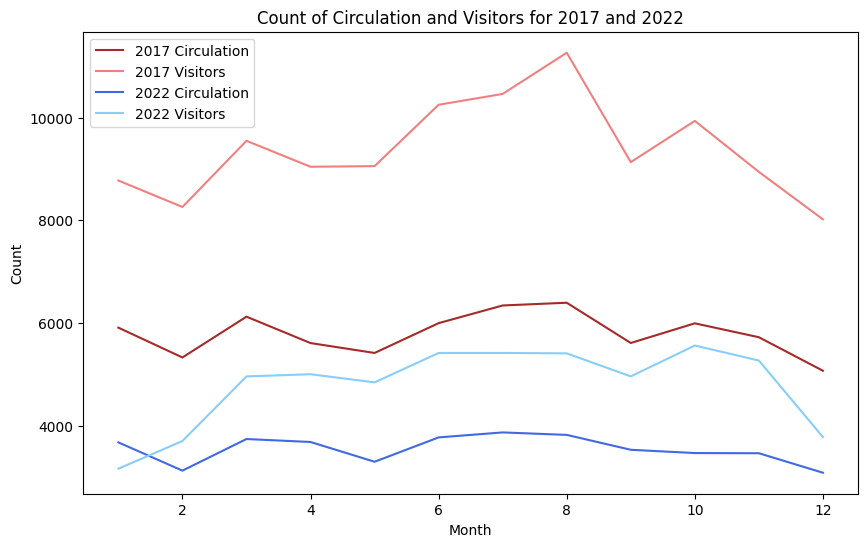

In [103]:
data_2017 = circ_years_2.loc[(circ_years_2['YEAR']==2017)]
data_2022 = circ_years_2.loc[(circ_years_2['YEAR']==2022)]
circ_2017 = data_2017.groupby(['MONTH'])[['CIRCULATION']].mean()
circ_2022 = data_2022.groupby(['MONTH'])[['CIRCULATION']].mean()
vis_2017 = data_2017.groupby(['MONTH'])[['VISITORS']].mean()
vis_2022 = data_2022.groupby(['MONTH'])[['VISITORS']].mean()

plt.figure(figsize=(10,6)) 
plt.plot(circ_2017, color = 'brown')
plt.plot(vis_2017, color = 'lightcoral')
plt.plot(circ_2022, color = 'royalblue')
plt.plot(vis_2022, color = 'lightskyblue')
plt.legend(['2017 Circulation', '2017 Visitors', '2022 Circulation','2022 Visitors'])
plt.ylabel('Count')
plt.xlabel('Month')
plt.title('Count of Circulation and Visitors for 2017 and 2022')
plt.show()

In [120]:
#graph edgewater -- 2011 - 2014 with the book mobile situation
# did reconstruction of branch change traction before and after

#graph waterworks

# graph montcler 

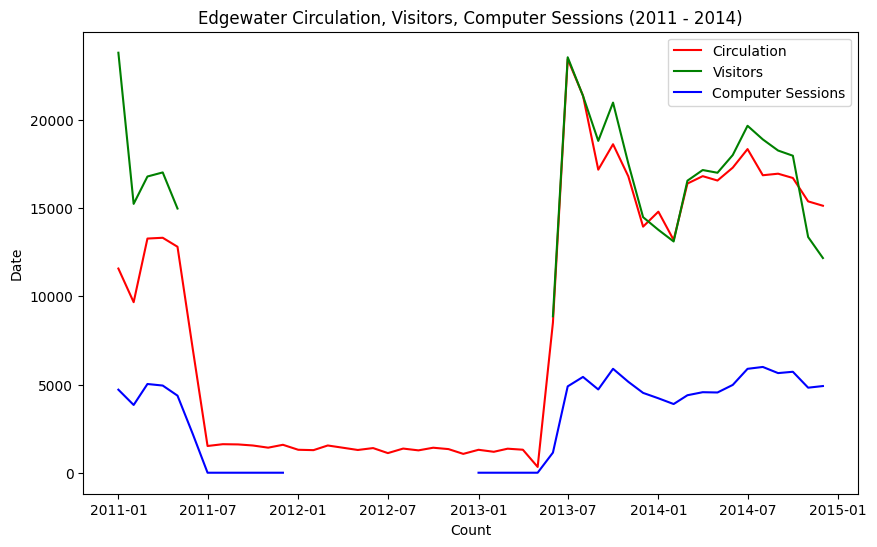

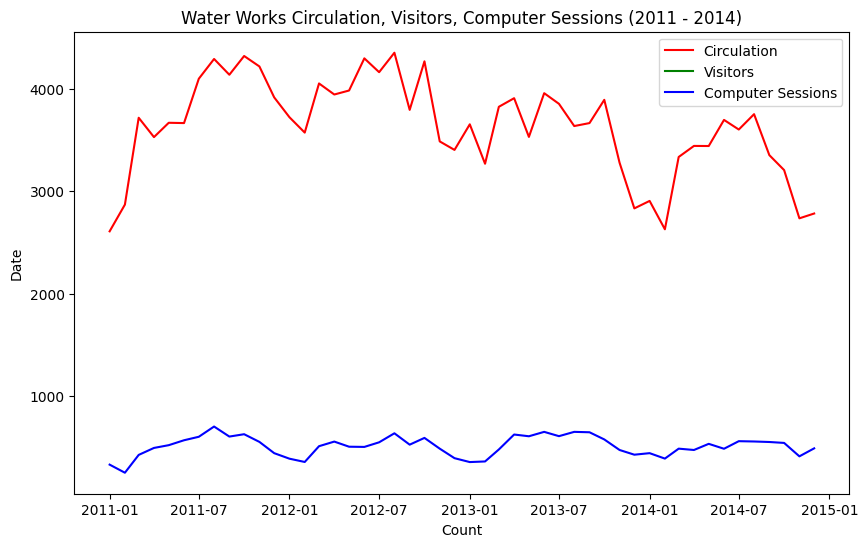

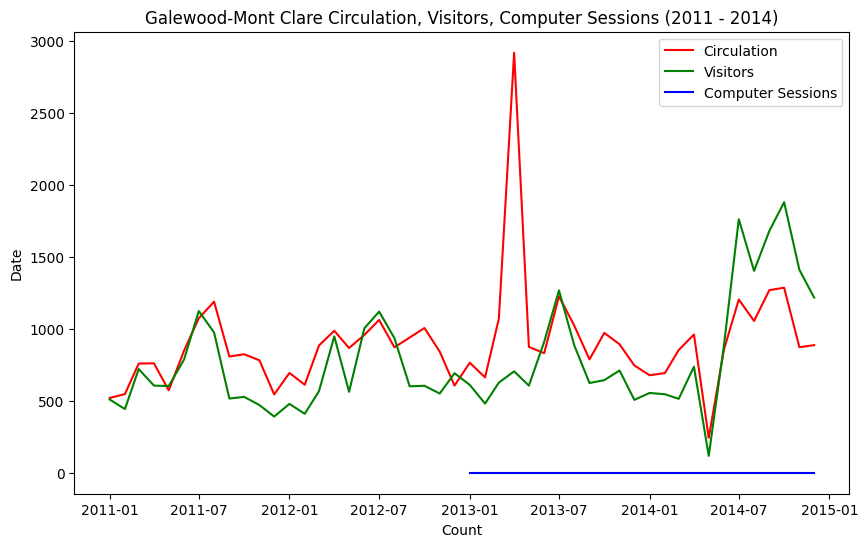

In [144]:
# Convert the 'YEAR' and 'MONTH' columns to a datetime format

branch_metrics['DATE'] = pd.to_datetime(branch_metrics[['YEAR', 'MONTH']].assign(DAY=1))

def branch_cvcomp_linegraphs(enter_branch):
    sel_branch = branch_metrics.loc[(branch_metrics['BRANCH']==enter_branch)&((branch_metrics['YEAR']==2011)|(branch_metrics['YEAR']==2012)|
                                                                        (branch_metrics['YEAR']==2013)|(branch_metrics['YEAR']==2014))]
    # Group the data by 'DATE' and calculate the mean number of circulation
    sel_branch_monthly_circ = sel_branch.groupby('DATE')['CIRCULATION'].mean()
    sel_branch_monthly_vis = sel_branch.groupby('DATE')['VISITORS'].mean()
    sel_branch_monthly_comp = sel_branch.groupby('DATE')['COMPUTER_SESSIONS'].mean()
    # Plot the monthly visitor patterns
    plt.figure(figsize=(10,6)) 
    plt.plot(sel_branch_monthly_circ, color = 'red')
    plt.plot(sel_branch_monthly_vis, color = 'green')
    plt.plot(sel_branch_monthly_comp, color = 'blue')
    plt.legend(['Circulation', 'Visitors', 'Computer Sessions'])
    plt.title(enter_branch+' Circulation, Visitors, Computer Sessions (2011 - 2014)')
    plt.ylabel('Date')
    plt.xlabel('Count')
    plt.show()
    return

branch_cvcomp_linegraphs("Edgewater")
branch_cvcomp_linegraphs("Water Works")
branch_cvcomp_linegraphs("Galewood-Mont Clare")